In [117]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

complete

Epoch 1/100
347/347 - 1s - 3ms/step - loss: 26.9978
Epoch 2/100
347/347 - 0s - 809us/step - loss: 22.1086
Epoch 3/100
347/347 - 0s - 663us/step - loss: 18.1253
Epoch 4/100
347/347 - 0s - 669us/step - loss: 15.4005
Epoch 5/100
347/347 - 0s - 669us/step - loss: 14.4384
Epoch 6/100
347/347 - 0s - 630us/step - loss: 13.9128
Epoch 7/100
347/347 - 0s - 573us/step - loss: 13.4815
Epoch 8/100
347/347 - 0s - 626us/step - loss: 13.0953
Epoch 9/100
347/347 - 0s - 625us/step - loss: 12.7455
Epoch 10/100
347/347 - 0s - 675us/step - loss: 12.4259
Epoch 11/100
347/347 - 0s - 582us/step - loss: 12.1325
Epoch 12/100
347/347 - 0s - 624us/step - loss: 11.8632
Epoch 13/100
347/347 - 0s - 666us/step - loss: 11.6158
Epoch 14/100
347/347 - 0s - 581us/step - loss: 11.3877
Epoch 15/100
347/347 - 0s - 623us/step - loss: 11.1768
Epoch 16/100
347/347 - 0s - 668us/step - loss: 10.9811
Epoch 17/100
347/347 - 0s - 623us/step - loss: 10.7990
Epoch 18/100
347/347 - 0s - 624us/step - loss: 10.6292
Epoch 19/100
347/347 

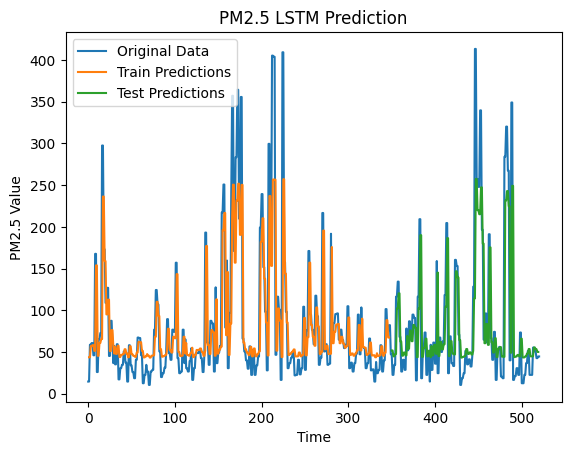

In [118]:
# CSV-Datei einlesen
df = pd.read_csv("werte_daten/werte_land_PM2_5.csv")

# Datumsspalte in DateTime-Objekte konvertieren
df['createdAt'] = pd.to_datetime(df['createdAt'])

# Mittelwert der Spalten 'value_1', 'value_2' und 'value_3' berechnen
df['mean_value'] = df[['value_1', 'value_2', 'value_3']].mean(axis=1)

# DataFrame auf ausgewählte Spalten reduzieren und createdAt als Index setzen
selected_df = df[['createdAt', 'value_1']].set_index('createdAt')
# Duplikate im Index entfernen
selected_df = selected_df[~df.index.duplicated(keep='first')]
# Remove rows with NaN values
selected_df = selected_df.dropna()
dataset = selected_df.values
dataset = dataset.astype('float32')

# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# Plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.legend(['Original Data', 'Train Predictions', 'Test Predictions'])
plt.title('PM2.5 LSTM Prediction')
plt.xlabel('Time')
plt.ylabel('PM2.5 Value')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━

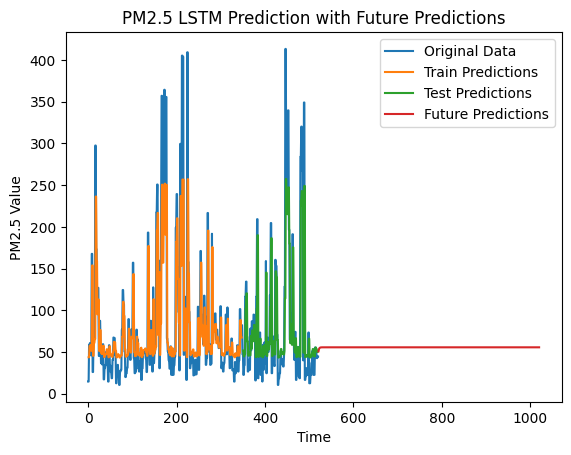

In [119]:
# Annahme: Dein Modell wurde bereits erstellt und trainiert (wie im vorherigen Code gezeigt)

# Vorbereiten der zukünftigen Daten (Beispiel: 10 zukünftige Zeitschritte)
future_time_steps = 500
future_data = dataset[-look_back:, 0]  # Die letzten bekannten Werte

# Vorhersagen für die zukünftigen Zeitschritte machen
future_predictions = []
for _ in range(future_time_steps):
    # Vorhersage für den nächsten Zeitschritt machen
    input_data = np.reshape(future_data, (1, 1, look_back))
    future_value = model.predict(input_data)
    future_predictions.append(future_value[0, 0])
    
    # Vorhersage in die Eingabedaten für die nächste Vorhersage einbeziehen
    future_data = np.roll(future_data, -1)
    future_data[-1] = future_value

# Visualisierung der zukünftigen Vorhersagen
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.plot(len(dataset) + np.arange(len(future_predictions)), scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1)))
plt.legend(['Original Data', 'Train Predictions', 'Test Predictions', 'Future Predictions'])
plt.title('PM2.5 LSTM Prediction with Future Predictions')
plt.xlabel('Time')
plt.ylabel('PM2.5 Value')
plt.show()

In [138]:
# CSV-Datei einlesen
df = pd.read_csv("werte_daten/werte_land_PM2_5.csv")

# Datumsspalte in DateTime-Objekte konvertieren
df['createdAt'] = pd.to_datetime(df['createdAt'])

# Mittelwert der Spalten 'value_1', 'value_2' und 'value_3' berechnen
df['mean_value'] = df[['value_1', 'value_2', 'value_3']].mean(axis=1)

# DataFrame auf ausgewählte Spalten reduzieren und createdAt als Index setzen
selected_df = df[['createdAt', 'mean_value']].set_index('createdAt')
# Duplikate im Index entfernen
selected_df = selected_df[~selected_df.index.duplicated(keep='first')]

selected_df = selected_df.reset_index()
# Remove rows with NaN values
selected_df = selected_df.dropna()

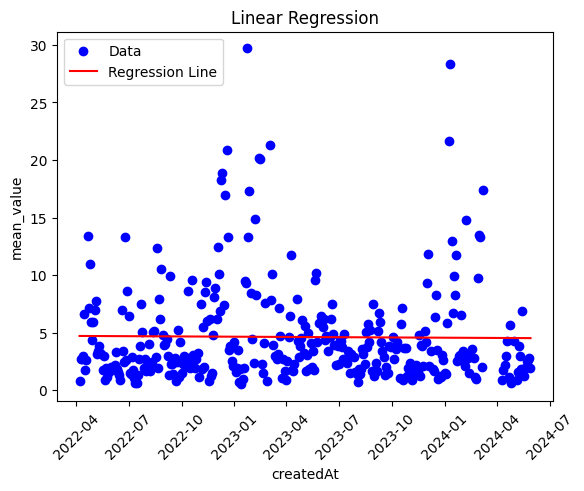

Regressionslinie: mean_value = -0.00 * createdAt + 9.29


In [140]:
# Umwandeln des Datumsindex in Unix-Zeit
selected_df['createdAt_unix'] = selected_df['createdAt'].astype('int64') // 10**9  # Umwandlung in Sekunden

# Modell initialisieren und trainieren
X = selected_df['createdAt_unix'].values.reshape(-1, 1)  # Unabhängige Variable (als Unix-Zeit)
y = selected_df['mean_value'].values.reshape(-1, 1)  # Abhängige Variable
model = LinearRegression()
model.fit(X, y)

# Regressionsgerade berechnen
intercept = model.intercept_[0]  # y-Achsenabschnitt
slope = model.coef_[0][0]  # Steigung der Geraden

# Vorhersagen treffen
predictions = model.predict(X)

# Plot der Daten und der Regressionsgeraden
plt.scatter(selected_df['createdAt'], selected_df['mean_value'], color='blue', label='Data')
plt.plot(selected_df['createdAt'], predictions, color='red', label='Regression Line')
plt.title('Linear Regression')
plt.xlabel('createdAt')
plt.ylabel('mean_value')
plt.legend()
plt.xticks(rotation=45)  # optional, um x-Achsenbeschriftungen zu drehen
plt.show()

# Regressionslinie ausgeben
print("Regressionslinie: mean_value = {:.2f} * createdAt + {:.2f}".format(slope, intercept))